In [2]:
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
from vedo import *

filenames = ['objs/fitModel_Demo_Augmentation.obj', 'objs/increasedModel_Demo_Augmentation.obj', 'objs/fitModel_Ctutc.obj', 'objs/fitModel_Demo_Reduction.obj', 'objs/fitModel_Hgcutc.obj', 'objs/fitModel_Jg.obj', 'objs/increasedModel_Ctutc.obj', 'objs/increasedModel_Demo_Reduction.obj', 'objs/increasedModel_Hgcutc.obj', 'objs/increasedModel_Jg.obj']

In [3]:
def getVertCoords(filename):
    file = open(filename, 'r')
    lines = file.readlines()
    file.close()
    
    coords = []
    for i in range(len(lines)):
        if not lines[i].startswith('v '):
            continue

        line = lines[i].split(" ")
        coords.append(float(line[1]))
        coords.append(float(line[2]))
        coords.append(float(line[3].replace('\n', '')))
    return coords

In [4]:
def getAllData():
    ret = []
    for filename in filenames:
        ret.append(getVertCoords(filename))
    return np.array(ret)

In [5]:
def show(objFile):
    mesh = Mesh(objFile)
    mesh.rotate_x(180)
    mesh.show()

In [34]:
def createFile(filename, verts):
    filestr = ''
    for i in range(int(len(verts)/3)):
        filestr = filestr + 'v ' + str(verts[3*i]) + ' ' + str(verts[3*i+1]) + ' '+ str(verts[3*i+2]) + '\n'

    filestrrest = ''
    file = open('objs/fitModel_Jg.obj', 'r')
    lines = file.readlines()
    idx = 0
    for i in range(len(lines)):
        if(not lines[i].startswith('v ')):
            filestrrest = filestrrest + lines[i]
    file.close()

    file = open(filename, 'w')
    file.write(filestr + filestrrest)
    file.close()

In [42]:
X = getAllData()
w = getVertCoords('objs/fitModel_Demo_Augmentation.obj')
pca = PCA(n_components=10)
pca.fit(X)
#eigenVectors = pca.components_
#eigenValues = pca.explained_variance_
covariance = pca.get_covariance()
print(covariance.shape)
eigenValues, eigenVectors = np.linalg.eig(covariance)
print(eigenValues.shape)
print(eigenVectors.shape)

(10062, 10062)
(10062,)
(10062, 10062)


(10062, 8)
(10062,)
(8,)
[2250, 1834, 760, 529, 224, 7.4, 1.8, 0.01]


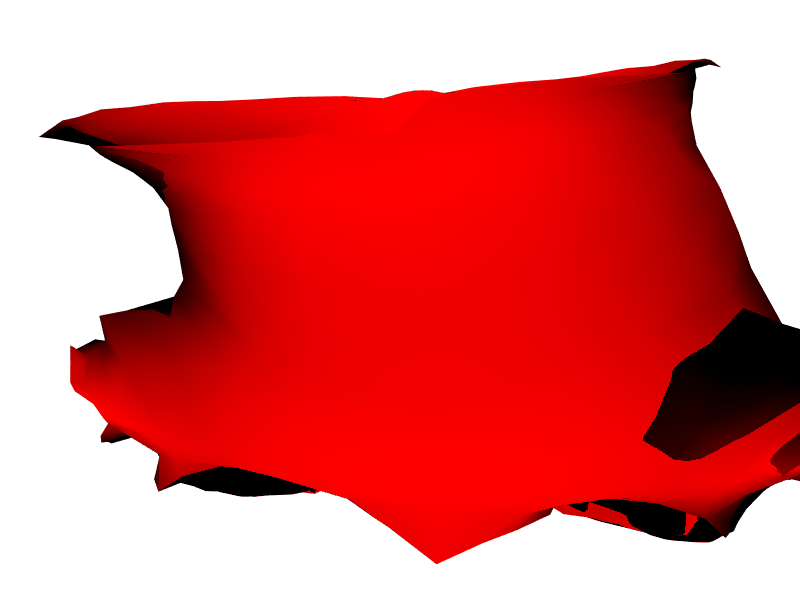

In [73]:
mean = pca.mean_
U_k = eigenVectors[:, 0:8]

x_red = np.dot(U_k.T, (w - mean).T)

print(U_k.shape)
print((w-mean).shape)
print(x_red.shape)
x_red = [2250, 1834, 760, 529, 224, 7.4, 1.8, 0.01]
#x_red[1] = 0
#x_red[2] = 0
print(x_red)

redModel = (np.dot(U_k, x_red) + mean).real

createFile('objs/w_.obj', redModel)
show('objs/w_.obj')

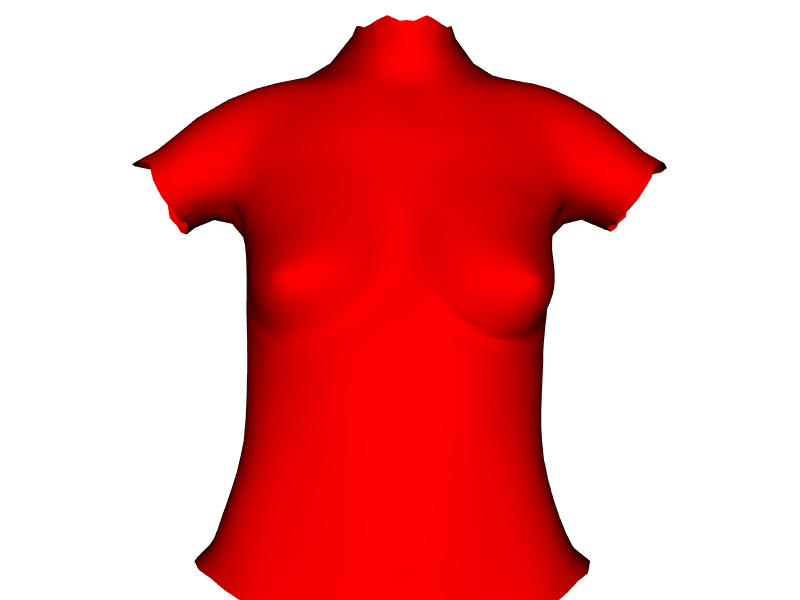

In [53]:
show('objs/fitModel_Demo_Augmentation.obj')

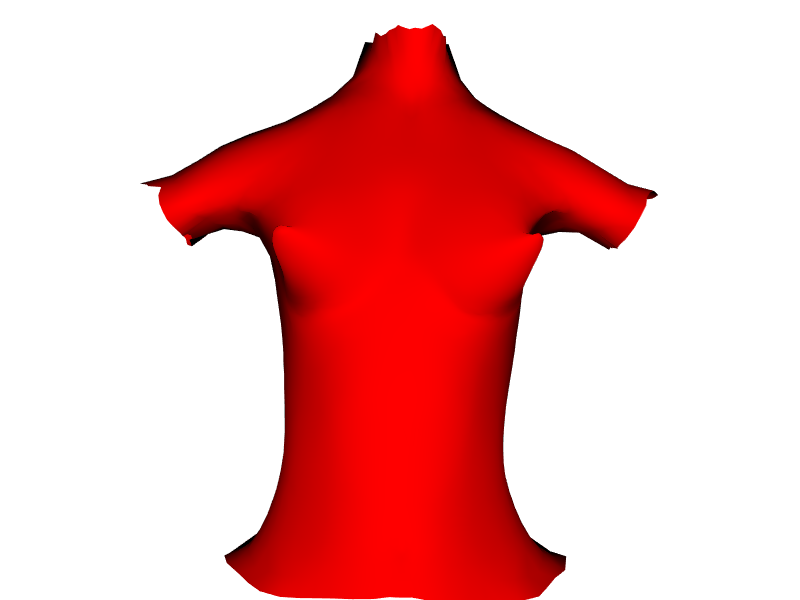